## House - Price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data1.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
CRIM       507 non-null float64
ZN         507 non-null float64
INDUS      507 non-null float64
CHAS       507 non-null int64
NOX        507 non-null float64
RM         502 non-null float64
AGE        507 non-null float64
DIS        507 non-null float64
RAD        507 non-null int64
TAX        507 non-null int64
PTRATIO    507 non-null float64
B          507 non-null float64
LSTAT      507 non-null float64
MEDV       507 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.6 KB


In [5]:
housing['CHAS'].value_counts()

0    472
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,502.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.606490,11.341223,11.138343,0.069034,0.554731,6.285952,68.599014,3.792498,9.532544,407.970414,18.460552,356.753373,12.643649,22.511834
std,8.594501,23.304861,6.853661,0.253762,0.115766,0.704891,28.126273,2.104408,8.706934,168.477585,2.165755,91.222103,7.137150,9.200138
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.000000,17.400000,375.425000,6.970000,16.900000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208500,77.700000,3.199200,5.000000,330.000000,19.100000,391.450000,11.340000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.628000,94.050000,5.164950,24.000000,666.000000,20.200000,396.235000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD44E7D128>,
      dtype=object)

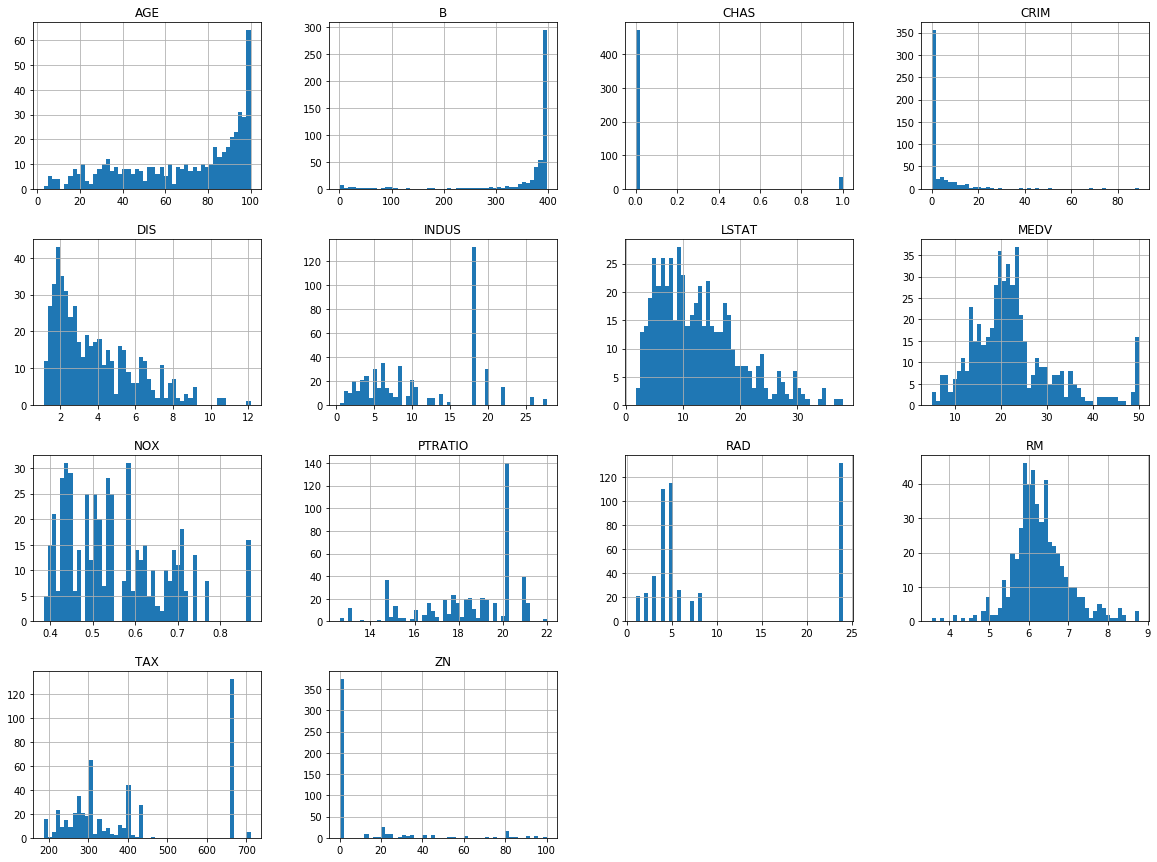

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

## Train-test splitting

In [9]:
import numpy as np

# For Learning purpose
"""def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
#     print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]"""

'def split_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n#     print(shuffled)\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled[:test_set_size]\n    train_indices = shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]'

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

In [12]:
# Sklearn's default train_test_split function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 405
 Rows in test set: 102


In [13]:
# For shuffle CHAS attribute in train & test equally the ratio of test & train are almost same
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    star_train_set = housing.loc[train_index]
    star_test_set = housing.loc[test_index]

In [14]:
star_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
star_train_set['CHAS'].value_counts()

0    377
1     28
Name: CHAS, dtype: int64

In [16]:
# 95/7

In [17]:
# 377/28

In [18]:
housing = star_train_set.copy()

## Locking For Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676810
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
LSTAT     -0.736915
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD481CFF28>,
      dtype=object)

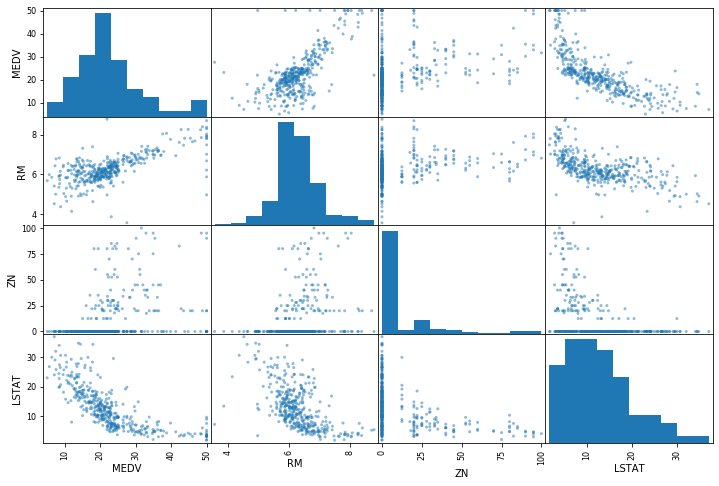

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

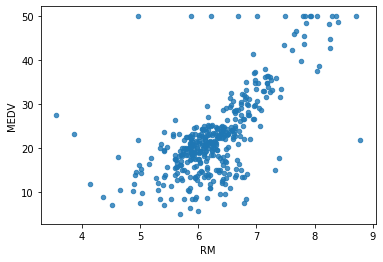

In [21]:
housing.plot(kind='scatter', x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute Combination

In [22]:
housing['TAXRM'] = housing['TAX']/housing['RM']  # We consider this for solveing our problem

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1,62.266904
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38,22.0,43.497173
174,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6,50.520567
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6,71.606254
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00,21.7,61.985472


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676810
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
TAXRM     -0.523267
LSTAT     -0.736915
Name: MEDV, dtype: float64

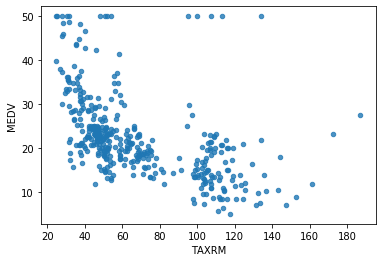

In [25]:
housing.plot(kind='scatter', x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
# Here we seperate features & labels
housing = star_train_set.drop("MEDV", axis=1) # Features
housing_label = star_train_set["MEDV"].copy() # Label

## Missing Attribute

In [27]:
# To take care of misssing attribuutes, you can have options:
#     1. Get rid of the misssing data poitn
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [28]:
a = housing.dropna(subset=["RM"])  #option 1
a.shape
# Note that the original dataframe will remain unchanged

(400, 13)

In [29]:
housing.drop("RM", axis=1).shape #option2 
# Note there is no RM column and also note that the original dataframe will remain unchanged

(405, 12)

In [30]:
# median() create the median
median = housing["RM"].median()  # Compute median for option 3
median

6.209

In [31]:
# fillna() fill the value in empty attributes
housing["RM"].fillna(median)
# Note that the original dataframe will remain unchanged

104    6.167
240    6.897
174    5.859
146    5.628
110    6.195
       ...  
142    5.403
114    6.254
178    6.860
321    6.376
234    6.726
Name: RM, Length: 405, dtype: float64

In [32]:
housing.shape

(405, 13)

In [33]:
housing.describe()  # Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,400.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.282145,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.711691,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.879750,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [35]:
# This shows the value the of housing that imputer calculates median
imputer.statistics_

array([2.8392e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2090e+00, 7.7700e+01, 3.1323e+00, 5.0000e+00, 3.3700e+02,
       1.9000e+01, 3.9095e+02, 1.1480e+01])

In [36]:
imputer.statistics_.shape

(13,)

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.281242,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.707320,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.884000,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimate some parameters based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - fits the dataset and calculates internal parameters

2. Transformers - transform method takes input & return output based on the learning form fit(). Also has a convenience function called fit_transform() which fits & then return transform.

3. Predictors - LinearRegression model is an example of predictor. fit() & predict() are two comman functions. It also gives score function which will evaluate the predictions.

## Features scaling

Primarily, two types of features scaling method:
1. Min-max scaling(Normalization)
    (value - min) / (max - min)
    sklearn provides a class called MinMaxScaler for this

2. Standardization
    (value - mean)/std
    sklearn provides a class called StandardScaler for this

## Creating Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     ...... add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [41]:
# fit the pipeline befor imputing
# housing_num_tr = my_pipeline.fit_transform(housing_tr)
housing_num_tr = my_pipeline.fit_transform(housing)  # We can also work with this, because we use imputer in our pipline

In [42]:
housing_num_tr

array([[-0.4286928 , -0.48908114, -0.4050388 , ...,  1.13740278,
         0.40915639, -0.05646069],
       [-0.43194899,  0.86823633, -0.93725295, ..., -0.88339597,
         0.39412847, -0.18915418],
       [-0.43551584, -0.48908114, -1.06627456, ..., -0.88339597,
         0.41479186, -0.43219278],
       ...,
       [-0.43774975, -0.48908114, -1.06627456, ..., -0.88339597,
         0.39433719, -0.8121152 ],
       [-0.423496  , -0.48908114, -0.57804506, ...,  0.52646362,
         0.4530922 , -0.81909906],
       [-0.39053551, -0.48908114, -0.75105131, ..., -0.50743342,
         0.07008883, -0.65427978]])

In [43]:
housing_num_tr.shape

(405, 13)

## Selecting a desired model for house prediction

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_label)  # In this, we need to give features & model seperately

c:\users\sudhir kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_label = housing_label.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([20.3 , 26.03, 22.  , 15.27, 21.51])

In [49]:
list(some_label)

[20.1, 22.0, 22.6, 15.6, 21.7]

## Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse
# mse  # Here decision Tree become overfitting

1.3783494333781354

##  Using better evaluation technique - Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([3.79131356, 3.18930148, 4.76063585, 2.83983639, 2.92512997,
       3.27373487, 4.02661427, 3.27204103, 4.53622806, 3.07232933])

In [54]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [55]:
print_scores(rmse_scores)

Scores:  [3.79131356 3.18930148 4.76063585 2.83983639 2.92512997 3.27373487
 4.02661427 3.27204103 4.53622806 3.07232933]
Mean:  3.5687164810122822
Standard deviation:  0.6424038042100205


## Saving the model

In [56]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [57]:
X_test = star_test_set.drop("MEDV", axis=1)
Y_test = star_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [58]:
final_rmse

3.228439038831456

In [59]:
prepared_data[0]

array([-0.4286928 , -0.48908114, -0.4050388 , -0.27252625, -0.32754745,
       -0.16171363,  0.75494174, -0.63432391, -0.54467747, -0.16577833,
        1.13740278,  0.40915639, -0.05646069])